In [2]:
# import required packages
import cv2
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
# Initialize image data generator with rescaling
train_data_gen = ImageDataGenerator(rescale=1./255,width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,shear_range=0.3,zoom_range=0.3)
validation_data_gen = ImageDataGenerator(rescale=1./255)

# Preprocess all test images
train_generator = train_data_gen.flow_from_directory(
        '/content/data/train',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

# Preprocess all train images
validation_generator = validation_data_gen.flow_from_directory(
        '/content/data/test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

In [ ]:
# create model structure
emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

cv2.ocl.setUseOpenCL(False)

emotion_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001, decay=1e-6), metrics=['accuracy'])

In [ ]:
# Train the neural network/model
emotion_model_info = emotion_model.fit(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=7178 // 64)

Epoch 1/50
448/448 [==============================] - 33s 59ms/step - loss: 1.7862 - accuracy: 0.2592 - val_loss: 1.7036 - val_accuracy: 0.3087
Epoch 2/50
448/448 [==============================] - 30s 67ms/step - loss: 1.7021 - accuracy: 0.3097 - val_loss: 1.5755 - val_accuracy: 0.4032
Epoch 3/50
448/448 [==============================] - 28s 62ms/step - loss: 1.5977 - accuracy: 0.3677 - val_loss: 1.3922 - val_accuracy: 0.4655
Epoch 4/50
448/448 [==============================] - 27s 59ms/step - loss: 1.4996 - accuracy: 0.4141 - val_loss: 1.3317 - val_accuracy: 0.4863
Epoch 5/50
448/448 [==============================] - 27s 60ms/step - loss: 1.4361 - accuracy: 0.4452 - val_loss: 1.2576 - val_accuracy: 0.5148
Epoch 6/50
448/448 [==============================] - 26s 58ms/step - loss: 1.3845 - accuracy: 0.4691 - val_loss: 1.2106 - val_accuracy: 0.5379
Epoch 7/50
448/448 [==============================] - 27s 59ms/step - loss: 1.3572 - accuracy: 0.4820 - val_loss: 1.1857 - val_accuracy:

In [ ]:
def plot_model_history(model_history):
    """
    Plot Accuracy and Loss curves given the model_history
    """
    plt.style.use('dark_background')
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    fig.savefig('plot.png')
    plt.show()

<ipython-input-6-37e2b4767761>:13: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
<ipython-input-6-37e2b4767761>:21: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)


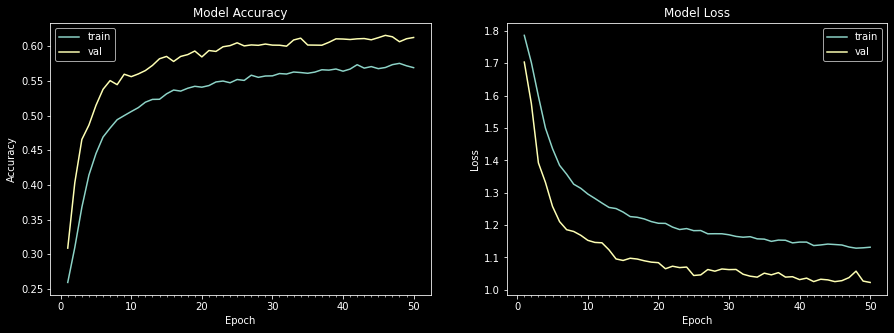

In [ ]:
plot_model_history(emotion_model_info)

In [ ]:
tr_predictions = emotion_model.predict(train_generator)

449/449 [==============================] - 26s 57ms/step


-----------------------------------------------------------------
[[ 513   15  200 1216  702  902  447]
 [  70    0   24  120   78  103   41]
 [ 539   14  184 1238  724  907  491]
 [ 917   27  336 2180 1280 1645  830]
 [ 639   15  218 1483  882 1151  577]
 [ 636   11  231 1473  867 1091  521]
 [ 410   15  165  950  600  712  319]]


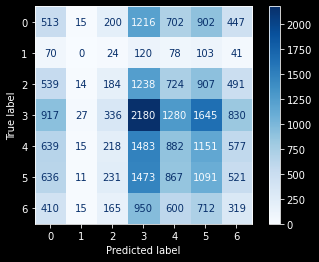

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.14      0.13      0.13      3995
           1       0.00      0.00      0.00       436
           2       0.14      0.04      0.07      4097
           3       0.25      0.30      0.27      7215
           4       0.17      0.18      0.17      4965
           5       0.17      0.23      0.19      4830
           6       0.10      0.10      0.10      3171

    accuracy                           0.18     28709
   macro avg       0.14      0.14      0.13     28709
weighted avg       0.17      0.18      0.17     28709



In [ ]:
print("-----------------------------------------------------------------")
# confusion matrix
c_matrix = confusion_matrix(train_generator.classes, tr_predictions.argmax(axis=1))
print(c_matrix)
cm_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=emotion_dict)
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

# Classification report
print("-----------------------------------------------------------------")
print(classification_report(train_generator.classes, tr_predictions.argmax(axis=1)))
clf_report = classification_report(train_generator.classes, tr_predictions.argmax(axis=1),output_dict=True)

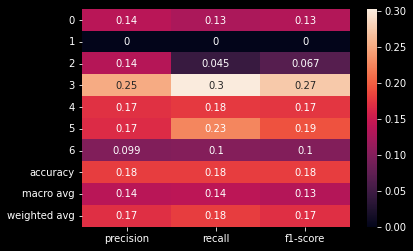

In [ ]:
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

In [ ]:
# do prediction on test data
predictions = emotion_model.predict(validation_generator)

113/113 [==============================] - 3s 22ms/step


In [ ]:
emotion_model.evaluate(validation_generator)

113/113 [==============================] - 3s 23ms/step - loss: 1.0231 - accuracy: 0.6126


[1.0231209993362427, 0.6125661730766296]

-----------------------------------------------------------------
[[151   3  69 266 170 171 128]
 [ 17   0   6  37  20  15  16]
 [130   2  55 310 193 209 125]
 [222   6 121 506 341 366 212]
 [179   6  83 349 222 245 149]
 [183   2  64 346 232 266 154]
 [136   4  34 230 153 163 111]]


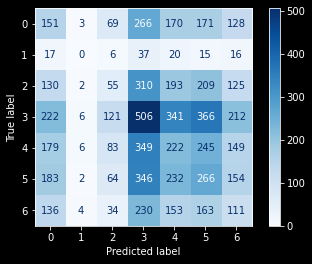

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.15      0.16      0.15       958
           1       0.00      0.00      0.00       111
           2       0.13      0.05      0.08      1024
           3       0.25      0.29      0.27      1774
           4       0.17      0.18      0.17      1233
           5       0.19      0.21      0.20      1247
           6       0.12      0.13      0.13       831

    accuracy                           0.18      7178
   macro avg       0.14      0.15      0.14      7178
weighted avg       0.17      0.18      0.18      7178



In [ ]:
print("-----------------------------------------------------------------")
# confusion matrix
c_matrix = confusion_matrix(validation_generator.classes, predictions.argmax(axis=1))
print(c_matrix)
cm_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=emotion_dict)
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

# Classification report
print("-----------------------------------------------------------------")
print(classification_report(validation_generator.classes, predictions.argmax(axis=1)))
clf_report1 = classification_report(validation_generator.classes, predictions.argmax(axis=1),output_dict=True)

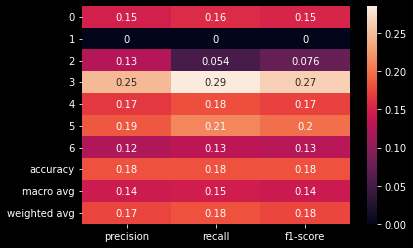

In [ ]:
sns.heatmap(pd.DataFrame(clf_report1).iloc[:-1, :].T, annot=True)

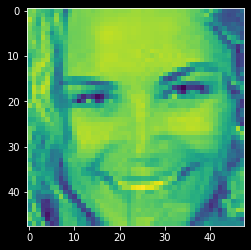

In [ ]:
img = load_img("/content/data/test/happy/PrivateTest_10077120.jpg",target_size = (48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)

In [ ]:
img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
img = img.reshape(1,48,48,1)
result = emotion_model.predict(img)
result = list(result[0])
print(result)
img_index = result.index(max(result))
print(emotion_dict[img_index])

1/1 [==============================] - 0s 153ms/step
[7.436965e-21, 0.0, 1.0, 8.702841e-32, 0.0, 0.0, 0.0]
Fearful


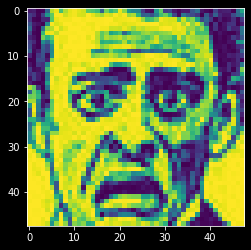

In [ ]:
img2 = load_img('/content/data/test/fear/PrivateTest_10306709.jpg',target_size=(48,48),color_mode='grayscale')
img2 = np.array(img2)
plt.imshow(img2)

In [ ]:
img2 = np.expand_dims(img2,axis = 0) #makes image shape (1,48,48)
img2 = img.reshape(1,48,48,1)
result = emotion_model.predict(img2)
result = list(result[0])
print(result)
img_index = result.index(max(result))
print(emotion_dict[img_index])

1/1 [==============================] - 0s 16ms/step
[7.436965e-21, 0.0, 1.0, 8.702841e-32, 0.0, 0.0, 0.0]
Fearful


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

In [ ]:
predictions[:2]

array([[1.4368469e-01, 1.4546944e-03, 5.3365819e-02, 1.8068066e-01,
        3.9614037e-01, 2.1402723e-01, 1.0646498e-02],
       [9.5457035e-05, 8.0264108e-06, 2.9733498e-02, 3.2547743e-03,
        1.1956641e-08, 2.8002303e-06, 9.6690547e-01]], dtype=float32)

In [ ]:
import pandas as pd

In [ ]:
y_test_dummies = pd.get_dummies(validation_generator.classes, drop_first=False).values

In [ ]:
import seaborn as sns

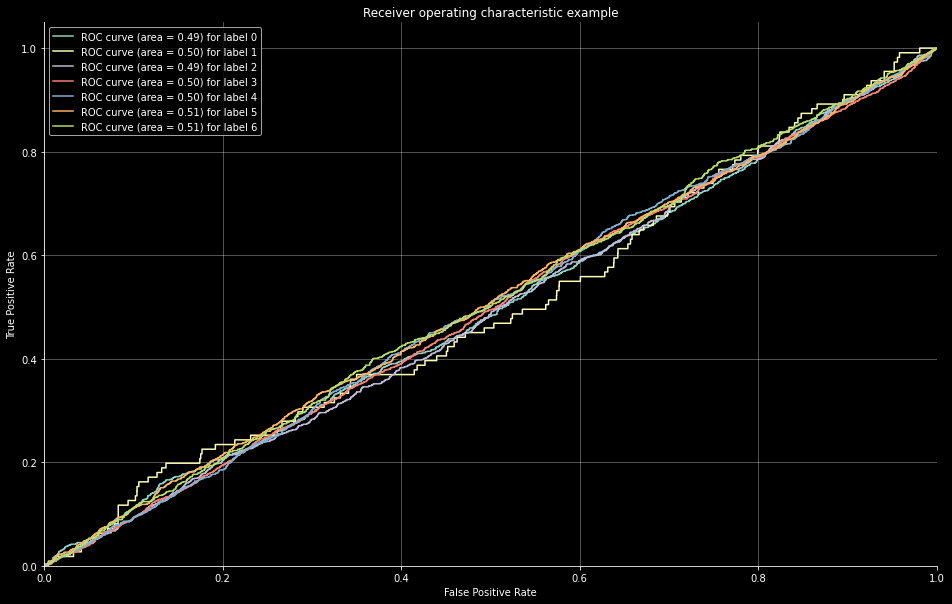

In [ ]:
def plot_multiclass_roc( prediction, y_test, n_classes, figsize=(17, 6)):

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], prediction[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_roc(predictions, validation_generator.classes, n_classes=7, figsize=(16, 10))